K-Means Clustering Tutorial  
Choosing the Optimal Number of Clusters Using the Elbow and Silhouette Methods

This notebook demonstrates how to apply K-Means clustering and how to select the optimal number of clusters (K) using the Elbow Method and Silhouette Score.


GitHub Link: https://github.com/riya-bhatta092/k-means-tutorial

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set(style="whitegrid")

# Suppress Windows MKL KMeans warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")



In [86]:
# Generate data with 3 true clusters (unknown to the algorithm)
X, y_true = make_blobs(
    n_samples=800, 
    centers=3, 
    cluster_std=1.20,
    random_state=42
)

# Normalise for fair clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


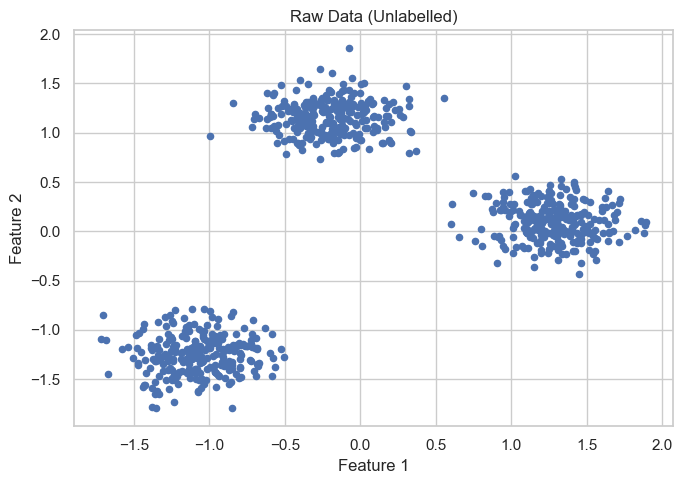

In [88]:
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], s=20)
plt.title("Raw Data (Unlabelled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()

plt.savefig("fig_raw_data.png", dpi=300)

plt.show()




In [90]:

inertia_values = []
silhouette_values = []

K_range = range(2, 11)  # We start from 2 because silhouette needs at least 2 clusters

for K in K_range:
    # Explicit n_init to avoid version issues with scikit-learn
    model = KMeans(n_clusters=K, random_state=42, n_init=10)
    
    # Fit the model and get cluster labels
    labels = model.fit_predict(X_scaled)
    
    # Inertia = within-cluster sum of squares
    inertia_values.append(model.inertia_)
    
    # Silhouette score = cohesion vs separation
    score = silhouette_score(X_scaled, labels)
    silhouette_values.append(score)

print("Done! Inertia values:", inertia_values)
print("Silhouette values:", silhouette_values)



Done! Inertia values: [514.4045920226389, 72.06655132934884, 62.33448338295358, 53.04469484584507, 44.28693325310148, 39.75028244579162, 35.617583088744226, 31.91995450150927, 29.05349720635678]
Silhouette values: [0.6714518897468347, 0.8123624925980829, 0.6585407134151435, 0.4867761869279589, 0.34005870460921317, 0.33997608550615266, 0.3401744864611068, 0.33431259780603717, 0.3382308308882041]


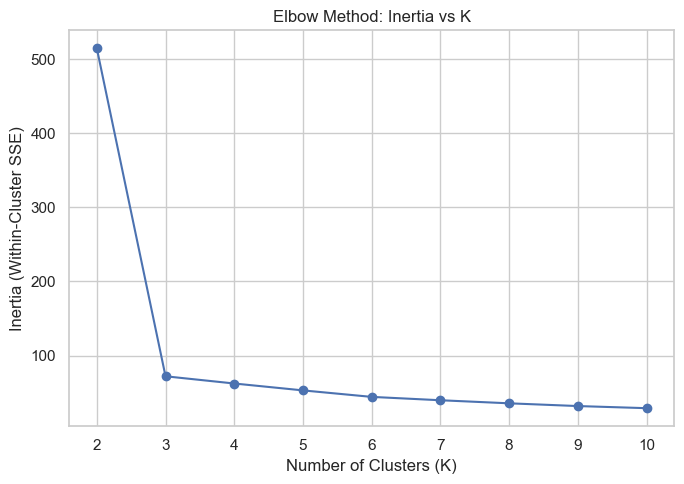

In [92]:
plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_values, marker='o')
plt.title("Elbow Method: Inertia vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.tight_layout()

plt.savefig("fig_elbow_inertia_vs_k.png", dpi=300)

plt.show()



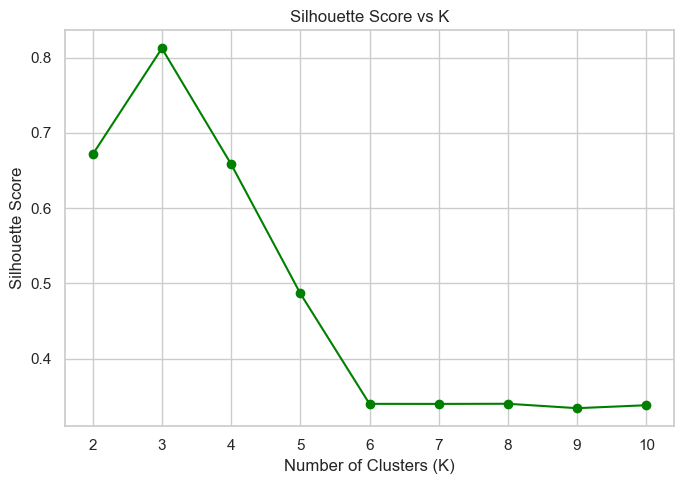

In [93]:
plt.figure(figsize=(7,5))
plt.plot(K_range, silhouette_values, marker='o', color='green')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.tight_layout()

plt.savefig("fig_silhouette_vs_k.png", dpi=300)

plt.show()



In [96]:
def plot_clusters(K):
    # Fit KMeans
    model = KMeans(n_clusters=K, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    centers = model.cluster_centers_

    # Create plot
    plt.figure(figsize=(7,5))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis', s=20)
    plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X')
    plt.title(f"K-Means Clustering (K={K})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()

    # SAVE + SHOW
    filename = f"fig_clusters_k{K}.png"
    plt.savefig(filename, dpi=300)  
    plt.show()                      

    print(f"Saved: {filename}")


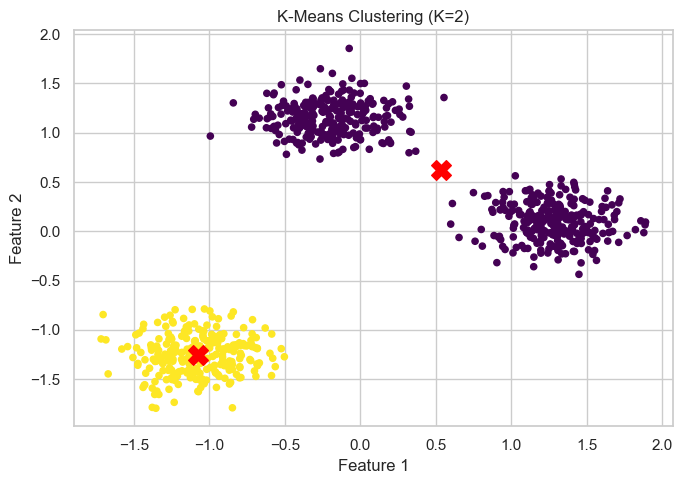

Saved: fig_clusters_k2.png


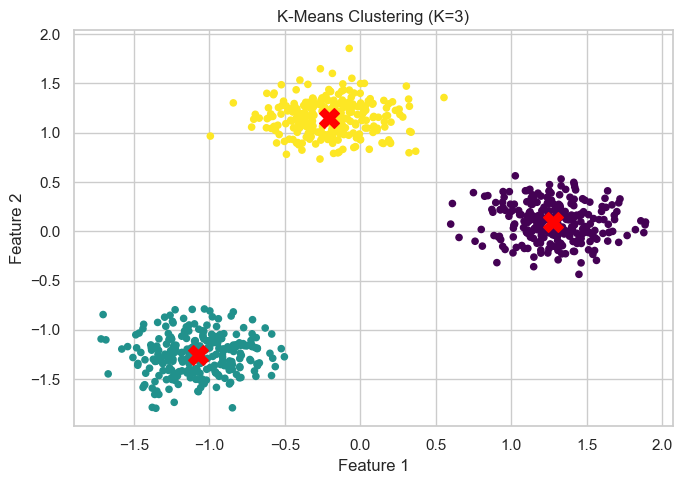

Saved: fig_clusters_k3.png


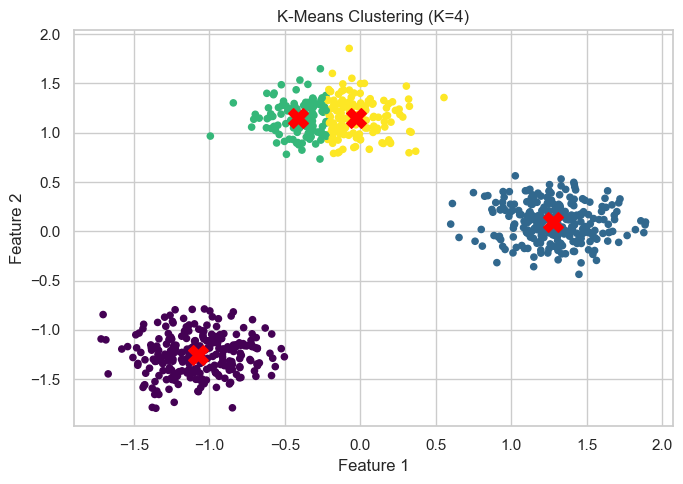

Saved: fig_clusters_k4.png


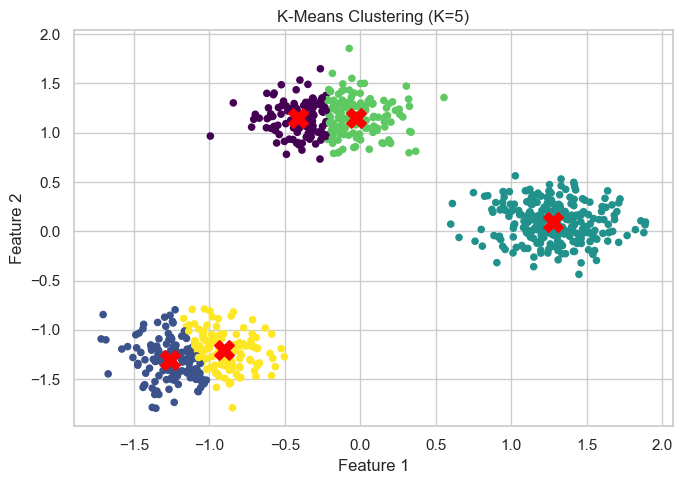

Saved: fig_clusters_k5.png


In [98]:
for K in [2, 3, 4, 5]:
    plot_clusters(K)


In [80]:
import pandas as pd

summary = pd.DataFrame({
    "K": list(K_range),
    "Inertia": inertia_values,
    "Silhouette Score": silhouette_values
})

summary


,K,Inertia,Silhouette Score
0,2,514.404592,0.671452
1,3,72.066551,0.812362
2,4,62.334483,0.658541
3,5,53.044695,0.486776
4,6,44.286933,0.340059
5,7,39.750282,0.339976
6,8,35.617583,0.340174
7,9,31.919955,0.334313
8,10,29.053497,0.338231


In [100]:
# Determine the best K based on the highest silhouette score
best_k_row = summary.loc[summary["Silhouette Score"].idxmax()]
best_k = int(best_k_row["K"])
best_sil = float(best_k_row["Silhouette Score"])

print(f"Best K by silhouette score: K = {best_k} (score = {best_sil:.3f})")


Best K by silhouette score: K = 3 (score = 0.812)
